# Endoderm explorer

In this notebook we perform trajectory inference using `PAGA`. The original [dataset](https://s3.amazonaws.com/dp-lab-data-public/mouse_endoderm/sc_endoderm_all_cells_counts.csv.gz) from endoderm explorer has been first sub-sampled (10,000 cells) followed by subsetting for specific cell types.

In [92]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import seaborn as sns
from matplotlib import cm, colors, rcParams
from pylab import rcParams

random_seed = 12345

In [ ]:
%run ../scripts/helpers.py

In [93]:
adata = sc.read("../data/processed/2_Kat.h5ad")

In [94]:
adata = adata[adata.obs.Timepoint.isin(["E7.5", "E8.75", "E8.75_ap", "E8.75_gfp"])]

In [95]:
adata = adata[
    ~adata.obs.CellType.isin(
        [
            "Blood",
            "Endothelial",
            "ExE",
            "GermCells",
            "ParE",
            "YsE",
            "Midline0",
            "Midline1",
            "Midline2",
            "Midline3",
            "mes0",
            "mes1",
            "mes2",
            "mes3",
            "mes4",
            "mes5",
            "mes6",
            "mes7",
            "EPI",
            "emVE1",
            "exVE"
        ]
    )
]

In [96]:
adata.obs['Batch'] = adata.obs.barcode.str.split('_', expand=True)[0]

Trying to set attribute `.obs` of view, copying.


In [97]:
sc.pp.normalize_total(adata, target_sum=10_000)
sc.pp.log1p(adata)
adata.raw = adata

sc.pp.highly_variable_genes(adata, n_top_genes=1_000, subset=True)

... storing 'Batch' as categorical


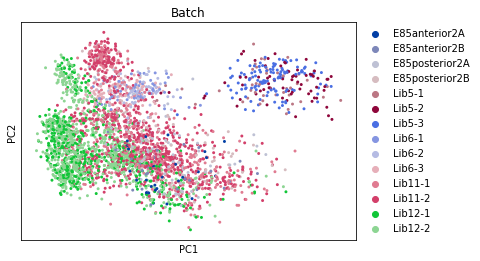

In [98]:
sc.tl.pca(adata, random_state=random_seed)
sc.pl.pca(adata, color='Batch')

In [99]:
sc.pp.neighbors(adata, random_state=random_seed)
sc.tl.umap(adata, random_state=random_seed)

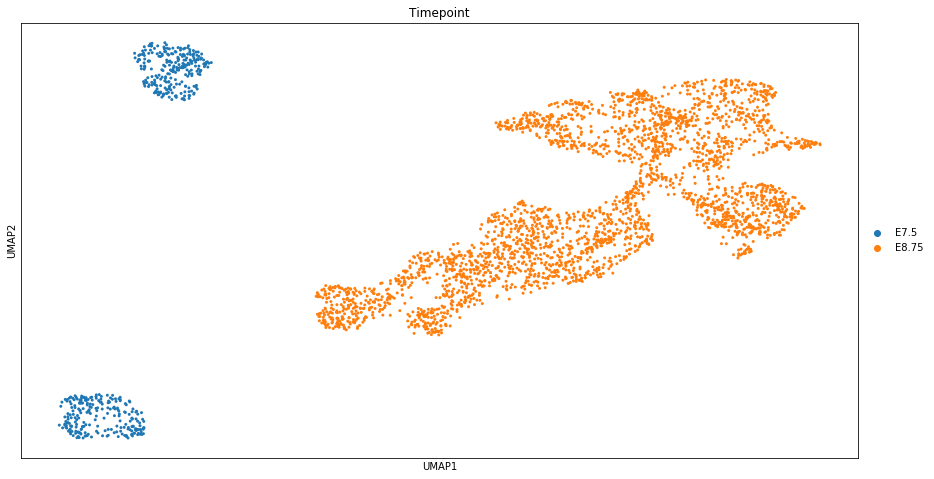

In [100]:
rcParams["figure.figsize"] = 15, 8
sc.pl.umap(adata, color="Timepoint")

In [102]:
sce.pp.bbknn(adata, batch_key="Batch")
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [104]:
sc.tl.umap(adata, random_state=random_seed)

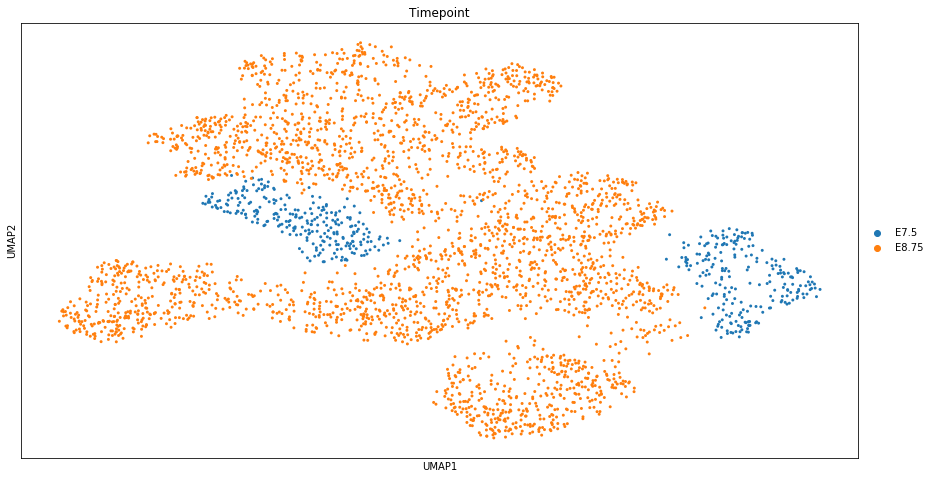

In [106]:
rcParams["figure.figsize"] = 15, 8
sc.pl.umap(adata, color="Timepoint")

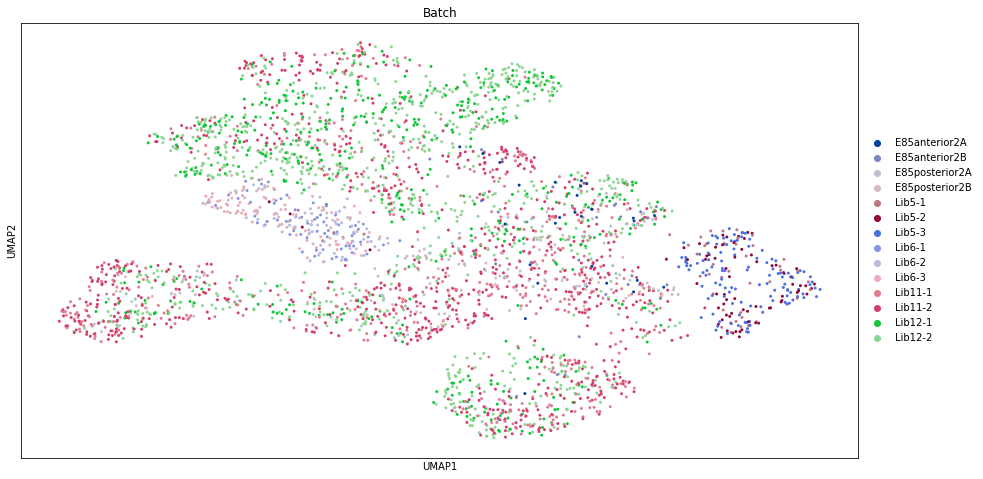

In [107]:
rcParams["figure.figsize"] = 15, 8
sc.pl.umap(adata, color="Batch")

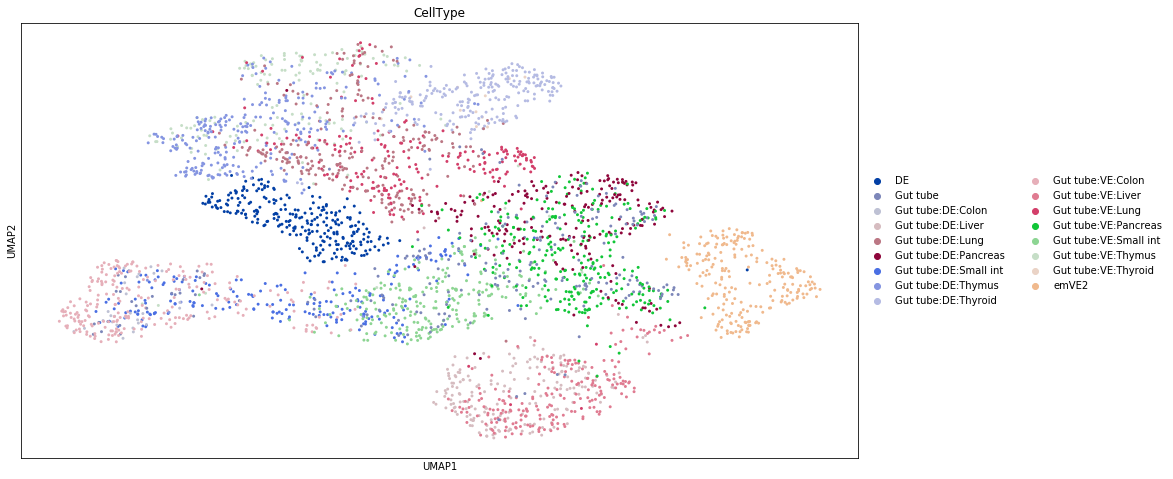

In [108]:
rcParams["figure.figsize"] = 15, 8
sc.pl.umap(adata, color="CellType")

In [109]:
sc.tl.embedding_density(adata, basis="umap", groupby="Timepoint")

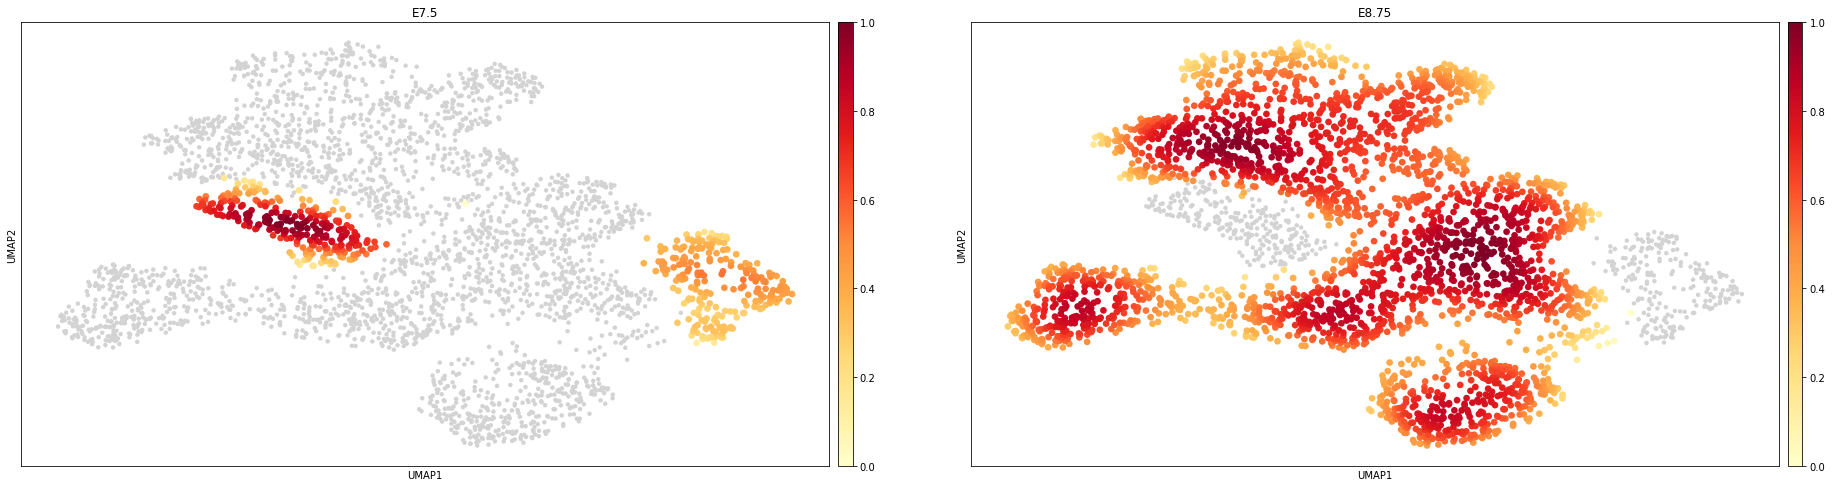

In [110]:
sc.pl.embedding_density(adata, basis="umap", key='umap_density_Timepoint', ncols=2)

## Trajectory inference with PAGA

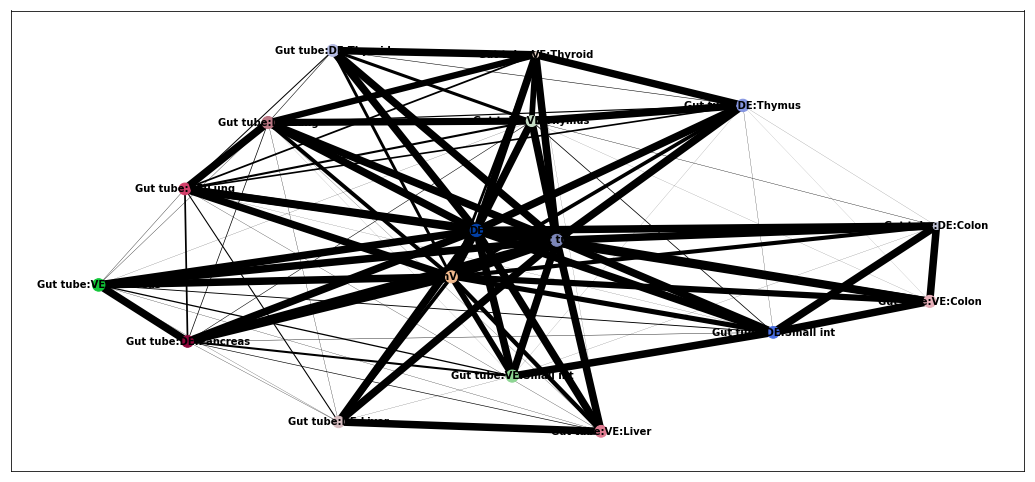

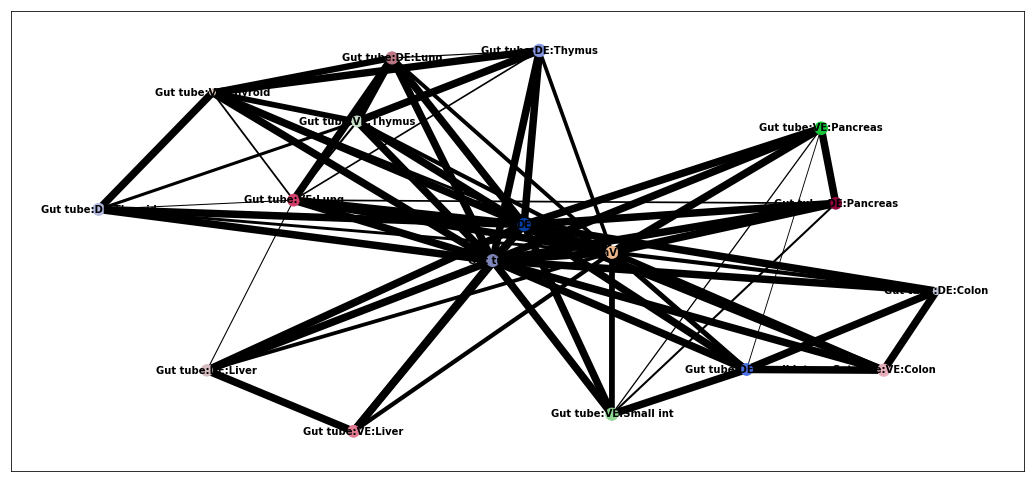

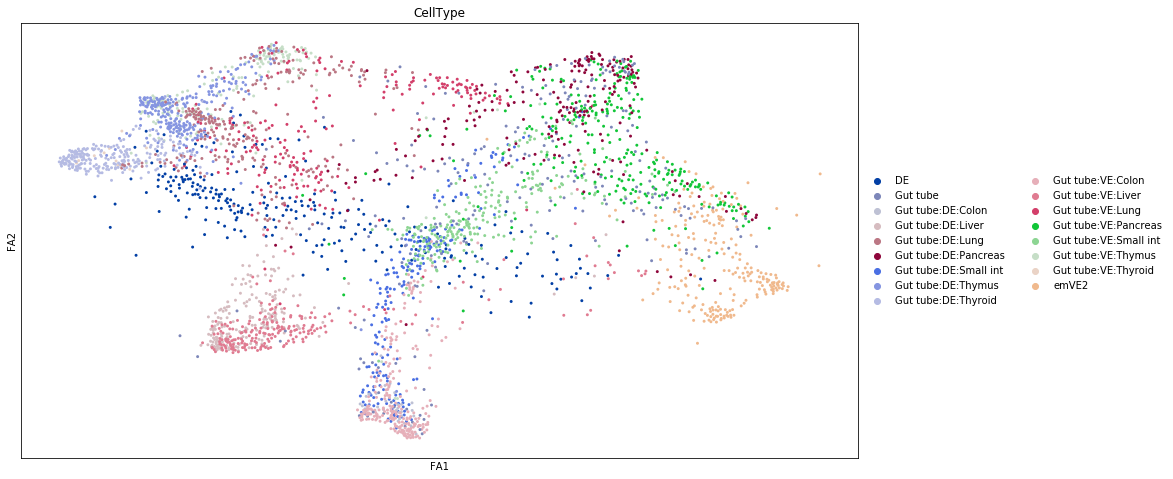

In [111]:
adata = run_paga(adata, by='CellType')

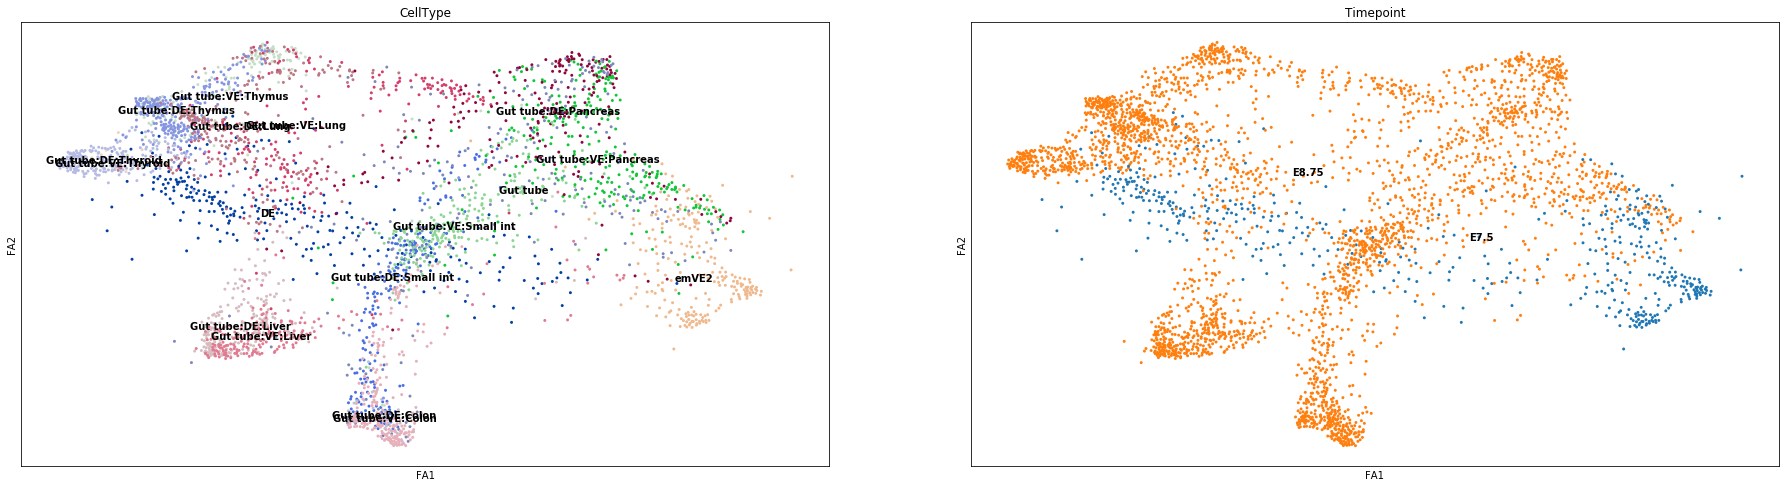

In [112]:
sc.pl.draw_graph(
    adata, color=["CellType", "Timepoint"], legend_loc="on data", color_map="plasma"
)

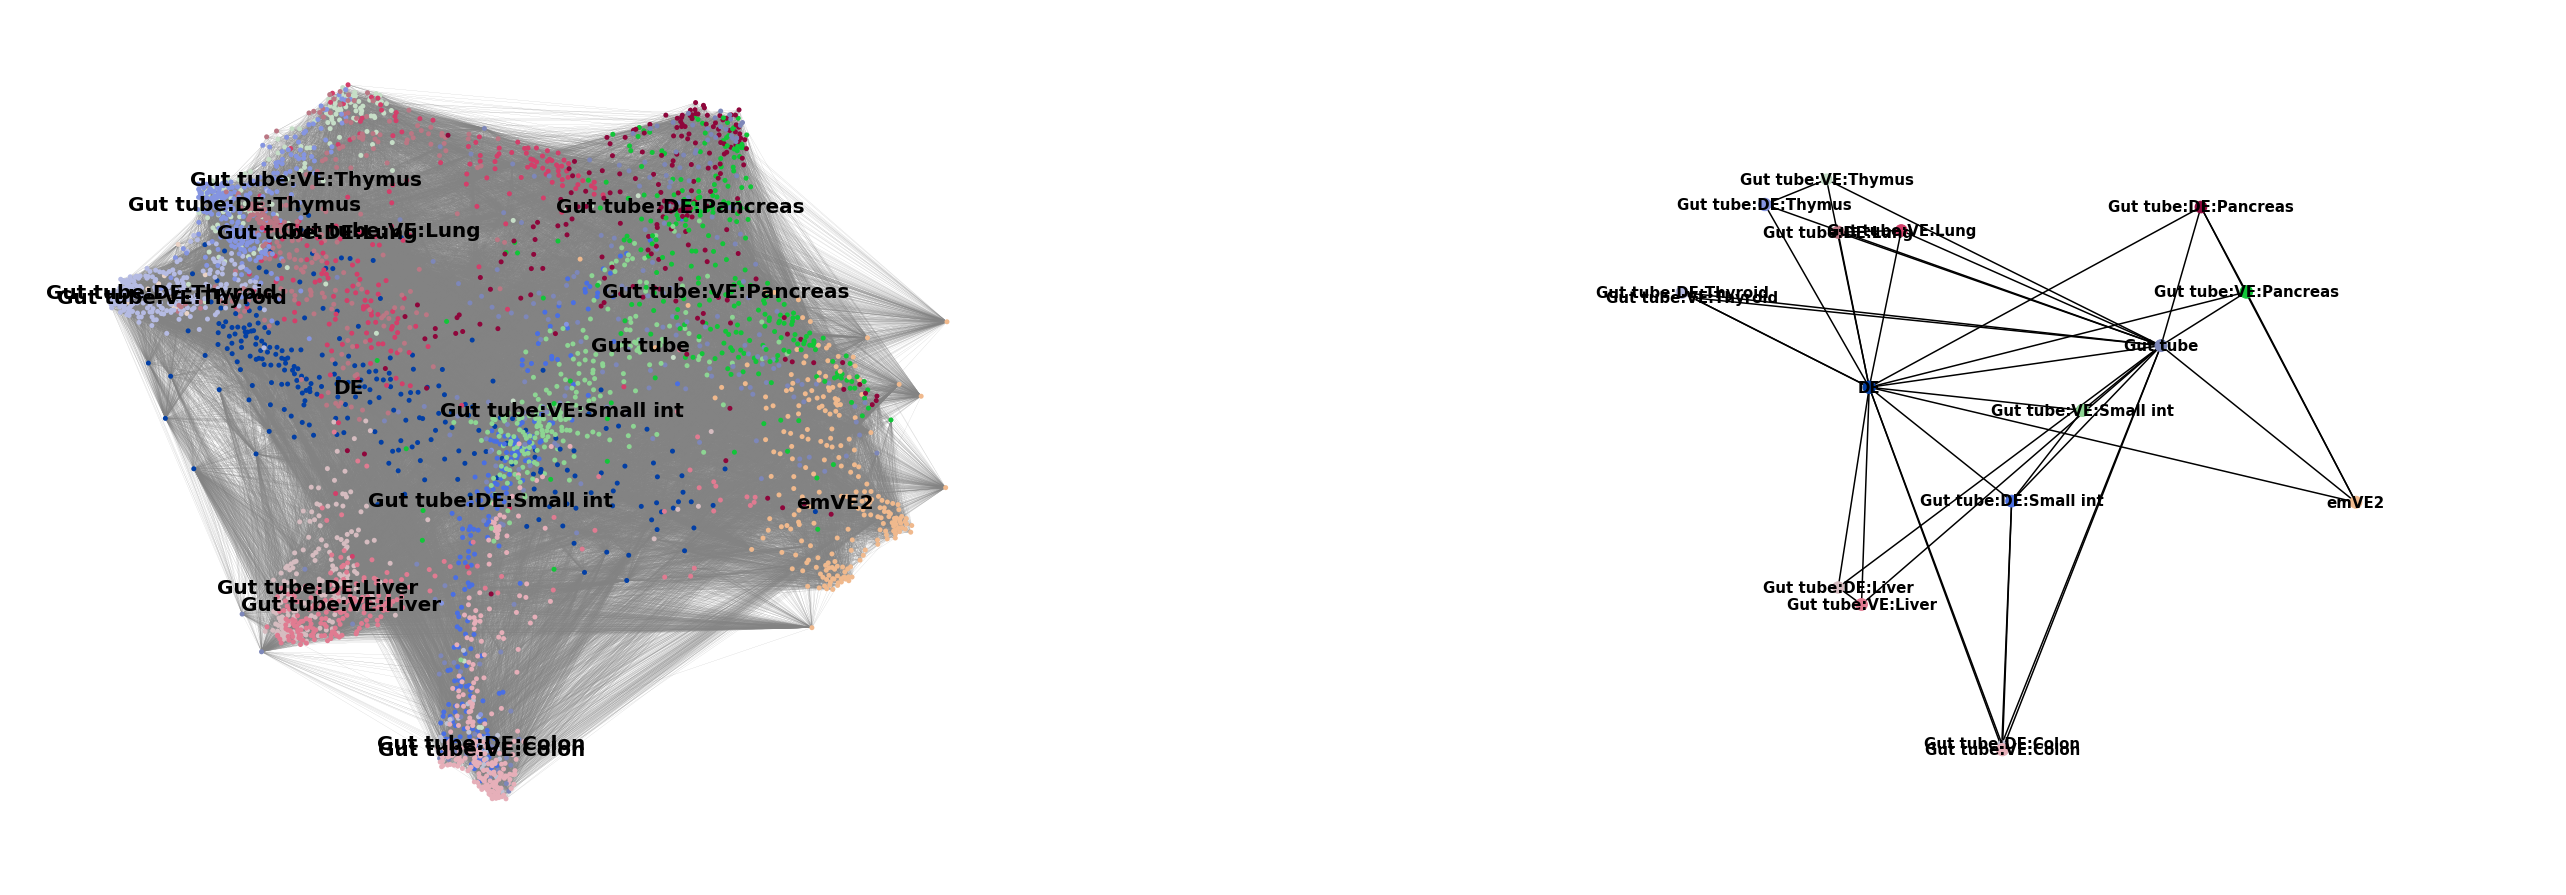

In [113]:
rcParams["figure.figsize"] = 15, 15
sc.pl.paga_compare(
    adata,
    threshold=1,
    title="",
    right_margin=0.5,
    size=100,
    edge_width_scale=0.2,
    legend_fontsize=20,
    fontsize=15,
    frameon=False,
    edges=True,
)

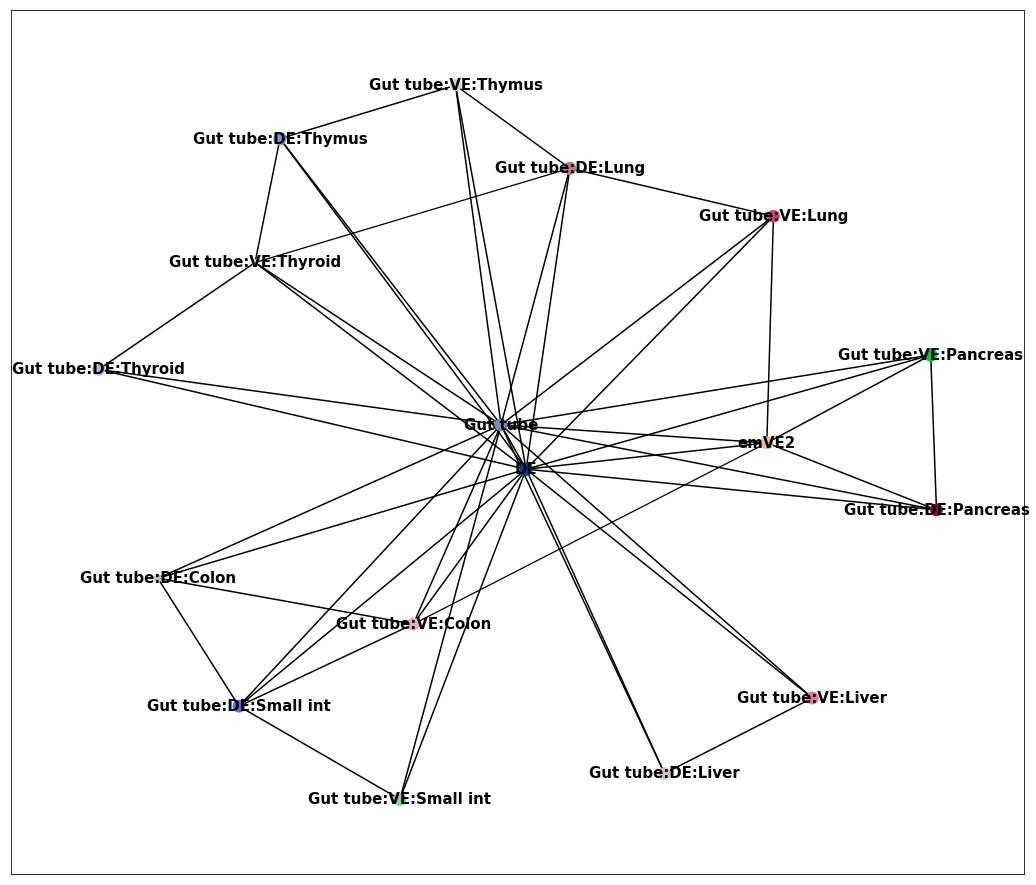

In [120]:
rcParams["figure.figsize"] = 15, 15
sc.pl.paga(adata, color="CellType", edge_width_scale=0.2, save="Now_PAGA_1.svg",threshold=0.8,fontsize=15)

In [12]:
!jupyter nbconvert --to html 12_endoderm_explorer.ipynb --output-dir="../reports"

[NbConvertApp] Converting notebook 12_endoderm_explorer.ipynb to html
[NbConvertApp] Writing 4198636 bytes to ../reports/12_endoderm_explorer.html
